## Homework 3

You will have to submit the following two completed ipython notebooks for this homework.

1. PCA_analysis
2. Reconstruction

In [16]:
%pylab inline
import pandas as pd
data_dir = "../Data/Weather/"

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


### Downloading Pickled data from S3
If `STAT.pickle` is not in the directory, get it using the following command

In [2]:
#!curl -o $data_dir/STAT.pickle http://mas-dse-open.s3.amazonaws.com/Weather/STAT.pickle

### Get the statistics from the Pickle File

In [3]:
import pickle
STAT, STAT_description=pickle.load(open(data_dir + 'STAT.pickle','r'))

In [4]:
STAT.keys()

['TMIN', 'TOBS', 'TMAX', 'SNOW', 'SNWD', 'PRCP']

In [5]:
STAT_description

[('SortedVals',
  'Sample of values',
  'vector whose length varies between measurements'),
 ('UnDef',
  'sample of number of undefs per row',
  'vector whose length varies between measurements'),
 ('mean', 'mean value', ()),
 ('std', 'std', ()),
 ('low100', 'bottom 1%', ()),
 ('high100', 'top 1%', ()),
 ('low1000', 'bottom 0.1%', ()),
 ('high1000', 'top 0.1%', ()),
 ('E', 'Sum of values per day', (365,)),
 ('NE', 'count of values per day', (365,)),
 ('Mean', 'E/NE', (365,)),
 ('O', 'Sum of outer products', (365, 365)),
 ('NO', 'counts for outer products', (365, 365)),
 ('Cov', 'O/NO', (365, 365)),
 ('Var', 'The variance per day = diagonal of Cov', (365,)),
 ('eigval', 'PCA eigen-values', (365,)),
 ('eigvec', 'PCA eigen-vectors', (365, 365))]

In [6]:
Scalars=['mean','std','low1000','low100','high100','high1000']
for meas in STAT.keys():
    !grep $meas '../Data/Weather/ghcnd-readme.txt'
    S=STAT[meas]
    for scalar in Scalars:
        print '%s:%f'%(scalar,S[scalar]),
    print

           TMIN = Minimum temperature (tenths of degrees C)
mean:44.531018 std:109.933072 low1000:-350.000000 low100:-245.000000 high100:239.000000 high1000:278.000000
 	   TOBS = Temperature at the time of observation (tenths of degrees C)
mean:113.582223 std:119.255224 low1000:-267.000000 low100:-167.000000 high100:339.000000 high1000:389.000000
           TMAX = Maximum temperature (tenths of degrees C)
mean:175.823101 std:123.742076 low1000:-233.000000 low100:-122.000000 high100:383.000000 high1000:433.000000
   	   SNOW = Snowfall (mm)
mean:2.126900 std:24.160393 low1000:0.000000 low100:0.000000 high100:76.000000 high1000:254.000000
	   SNWD = Snow depth (mm)
mean:21.454498 std:123.727039 low1000:0.000000 low100:0.000000 high100:508.000000 high1000:1676.000000
           PRCP = Precipitation (tenths of mm)
mean:24.277398 std:100.174134 low1000:0.000000 low100:0.000000 high100:356.000000 high1000:830.000000


### Script for plotting yearly plots 

In [7]:
def YearlyPlots(T,ttl='',yl='',xl='',y=None,x=None,size=(10,7), c=None):
    yearday=[i for i in range(1,366)]
    fig=figure(1,figsize=size,dpi=300)
    if shape(T)[0] != 365:
        raise ValueError("First dimension of T should be 365. Shape(T)="+str(shape(T)))
    if c is not None:
        plot_date(yearday,T, '-',color=c);
    else:
        plot_date(yearday,T, '-', );

    # rotate and align the tick labels so they look better
    plt.gca().xaxis.set_major_formatter( DateFormatter('%b %d') )
    labels = plt.gca().get_xticklabels()
    plt.setp(labels, rotation=30, fontsize=10)

    #fig.autofmt_xdate()
    ylabel(yl)
    xlabel(xl)
    if y is not None:
        ylim(y)
    if x is not None:
        xlim(x)
    grid()
    title(ttl)

### Plot the following 3 plots for each measurement:

1. A histogram from the sample values (from SortedVals) restricted between low100 and high100 (By which we mean that any value larger or equal to low100 and smaller or equal to high100 is included).
2. Plot of mean and mean $\pm$ std
3. Number of measurements recorded each day

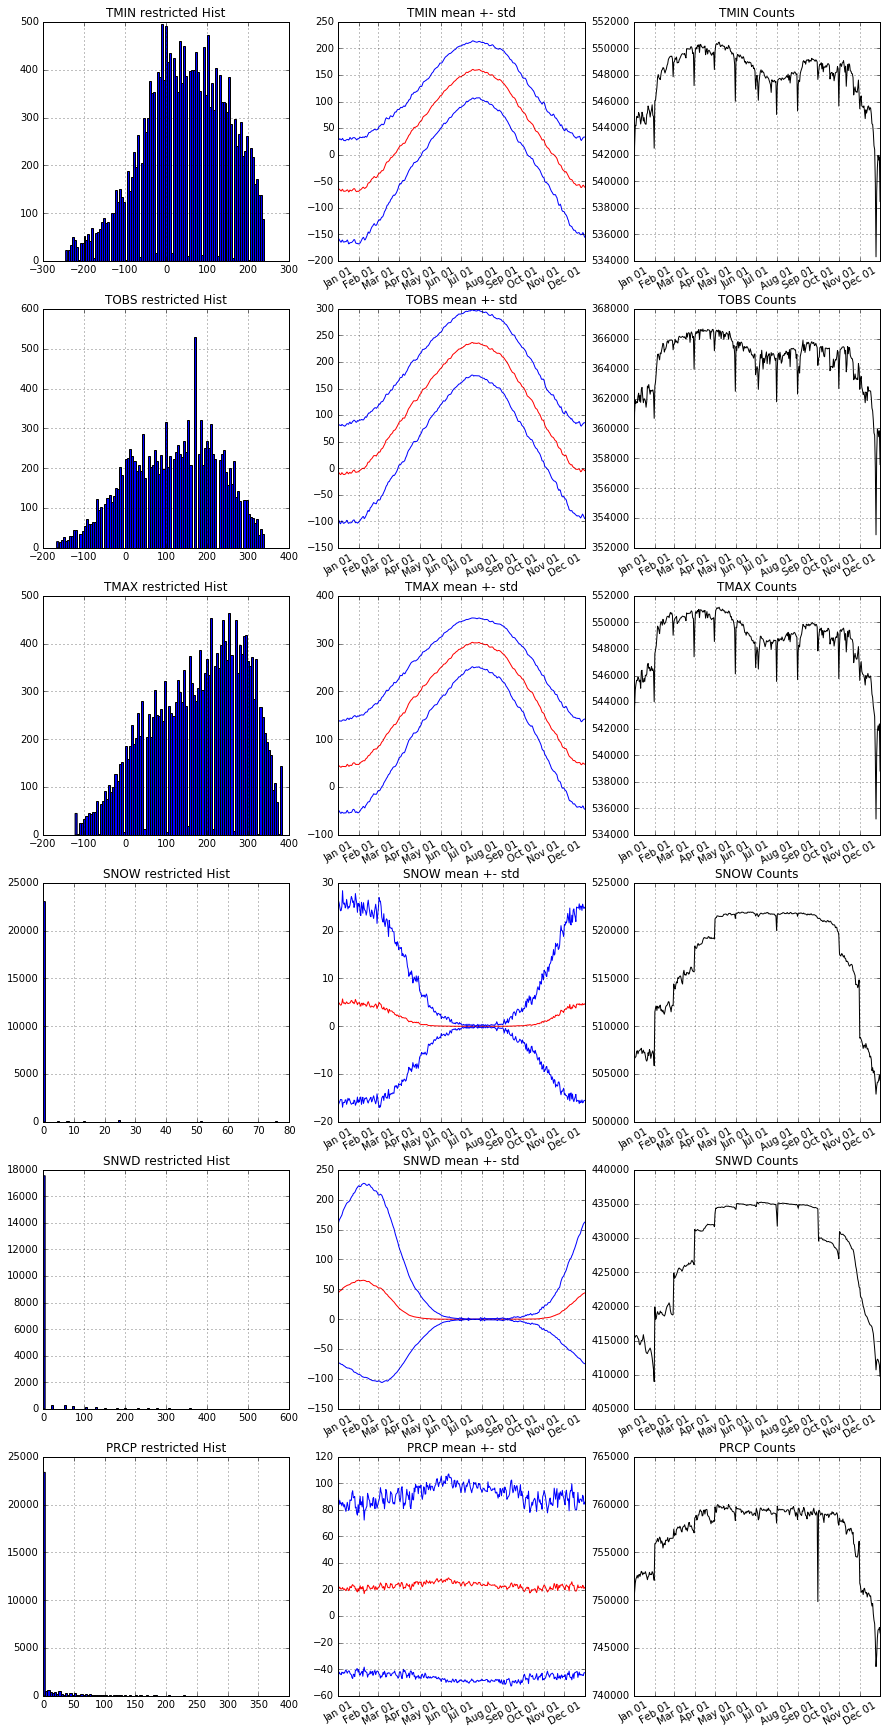

In [8]:
figure(figsize=(15,30))
offset=1
for meas in STAT.keys():
    subplot(6,3,offset)
    offset+=1
    # Plot histogram
    values = STAT[meas]['SortedVals']
    values = values[(values >= STAT[meas]['low100']) & (values <= STAT[meas]['high100'])]
    plt.hist(values, bins=100, color='b')
    plt.title(meas + ' restricted Hist')
    plt.grid()
    
    subplot(6,3,offset)
    offset+=1
    # Plot mean and mean +- std
    YearlyPlots(STAT[meas]['Mean'], c='r')
    YearlyPlots(STAT[meas]['Mean'] + np.sqrt(STAT[meas]['Var']), c='b')
    YearlyPlots(STAT[meas]['Mean'] - np.sqrt(STAT[meas]['Var']), ttl=meas + " mean +- std", c='b')
    subplot(6,3,offset)

    offset+=1
    ## Plot for number of measurements
    YearlyPlots(STAT[meas]['NE'], ttl=meas + ' Counts', c='k')

### Plot the Number of measurements recorded each day for TMAX

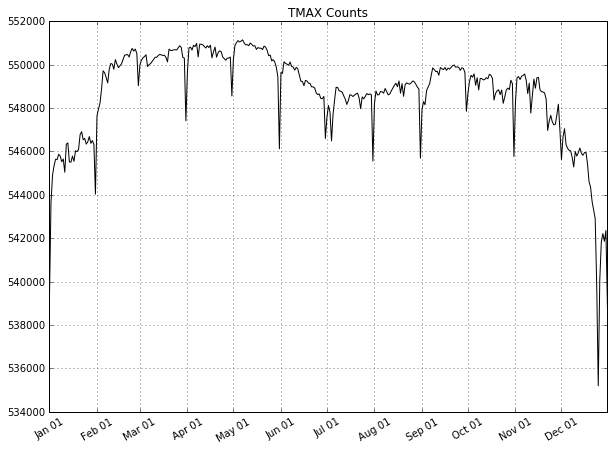

In [9]:
YearlyPlots(STAT['TMAX']['NE'], ttl='TMAX Counts', c='k')

### Extra Credit
* Can you figure out what is the reason for these lower counts (especially at the beginning and end of the year and also the sudden dip at the end of each month)? Is it restricted to a subset of the stations? Suggest a way to remove this effect.

* Can you Explain the counts per day for "SNWD" ?

Provide your explanation in new markdown cells appended after this cell. Support your explanation
using code cells and graphs. If you need more data that is available only in the full dataset in the cloud but not in the data you have downloaded, contact your TA.


---

**Can you figure out what is the reason for these lower counts (
    especially at the beginning and end of the year and also the sudden dip at the end of each month)? 
Is it restricted to a subset of the stations? Suggest a way to remove this effect.**

- The lower count could be because of maintenance activity.

- In almost all years we see the same pattern. So this could not be a missing data.

- There could have been maintanance activity on last day of each month.

- Another experiment on station data is done. stations are sorted based on total counts and grouped.

- Stations with low counts do not show any pattern.

- Stations with medium and high counts show a similar pattern.

### Instructor comments
Plausible explanations, but no supportive evidence.

No extra credit.

### Plot TMAX counts for every decade.

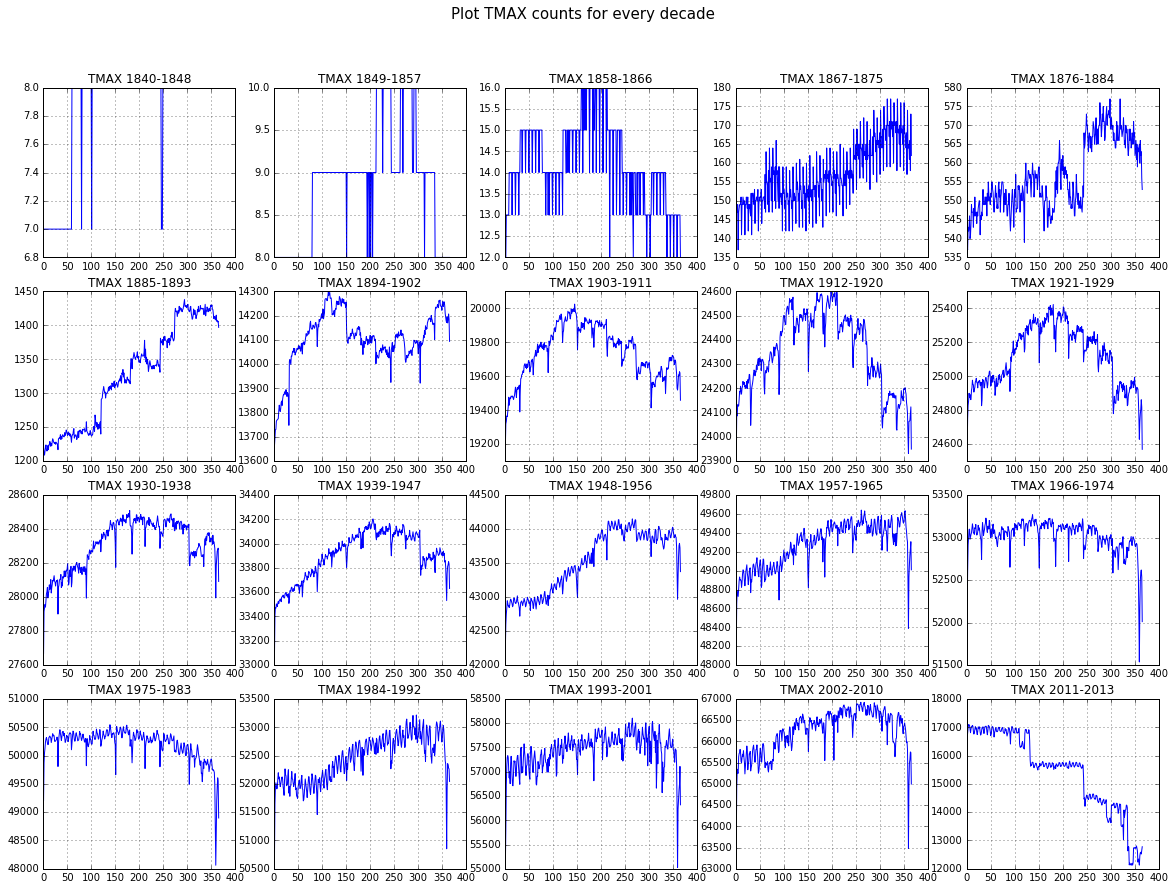

In [87]:
tmax_all_years = pickle.load(open(data_dir + 'tmax_all_years.pickle','r'))
tmax_year_df = pd.DataFrame({year:counts for year, counts in tmax_all_years}, index=range(1, 366)).T

num_columns = 5
num_rows = 4
# Plot the images
fig = plt.figure(figsize=(num_columns * 4, 3.5 * num_rows))
fig.suptitle("Plot TMAX counts for every decade", fontsize=15)
for i, j in enumerate(range(0, len(tmax_year_df), 9)):
    ax = fig.add_subplot(num_rows, num_columns, i + 1)
    start_index, end_index = (j, j + 8) if j + 8 <= len(tmax_year_df) - 1 else (j, len(tmax_year_df) - 1)
    ax.plot(tmax_year_df.columns,
            tmax_year_df.iloc[start_index:end_index, :].sum().values, c='b')
    start_year, end_year = str(int(tmax_year_df.index[start_index])), str(int(tmax_year_df.index[end_index]))
    ax.set(title="TMAX " + start_year + "-" + end_year)
    ax.grid()

### Plot TMAX for every group of stations.

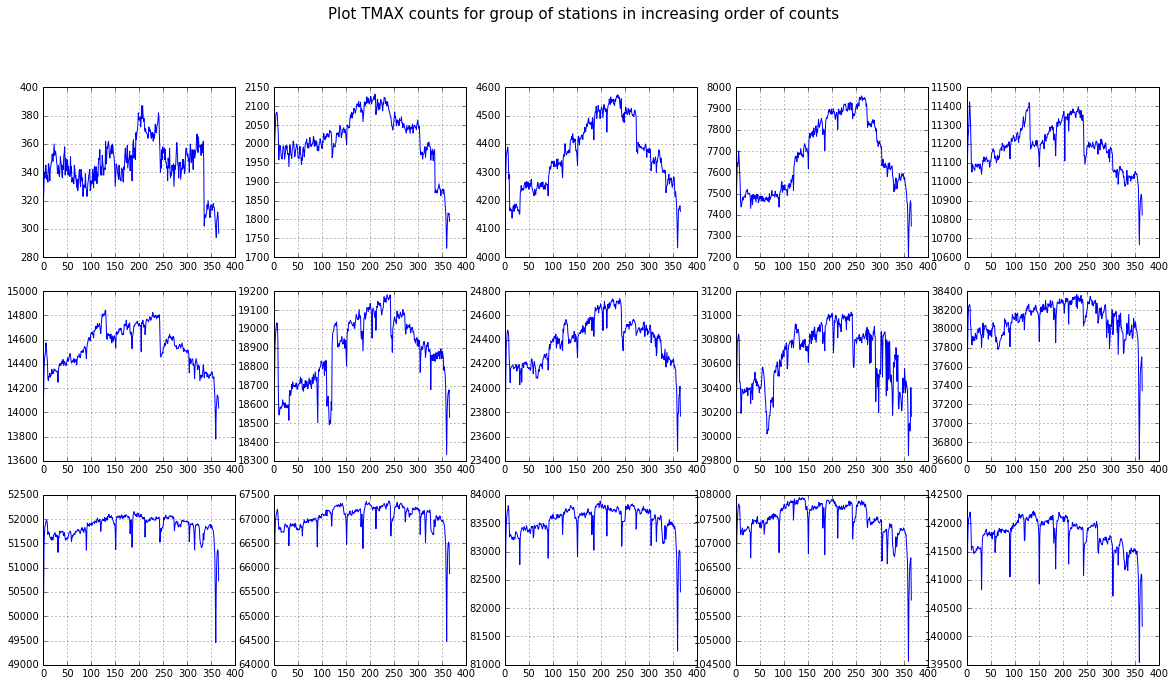

In [86]:
tmax_all_stations = pickle.load(open(data_dir + 'tmax_all_stations.pickle','r'))
tmax_station_df = pd.DataFrame({station:counts for station, counts in tmax_all_stations}, index=range(1, 366)).T

# Find the indices that sort the total counts.
sorted_index = tmax_station_df.sum(axis=1).argsort()

# rearrange the data frame according to sorted index.
tmax_station_df = tmax_station_df.iloc[sorted_index, :]

num_columns = 5
num_rows = 4

val_range = len(tmax_station_df) / 15 + 1
# Plot the images
fig = plt.figure(figsize=(num_columns * 4, 3.5 * num_rows))
fig.suptitle("Plot TMAX counts for group of stations in increasing order of counts", fontsize=15)
for i, j in enumerate(range(0, len(tmax_station_df), val_range)):
    ax = fig.add_subplot(num_rows, num_columns, i + 1)
    start_index, end_index = (j, j + val_range  - 1) \
        if j + val_range- 1 <= len(tmax_station_df) - 1 else (j, len(tmax_station_df) - 1)
    ax.plot(tmax_station_df.columns,
            tmax_station_df.iloc[start_index:end_index, :].sum().values, c='b')
    ax.grid()

**Can you Explain the counts per day for "SNWD" ?**

- The counts per day for SNWD is slightly different compared to TMAX

- For TMAX the counts are low on last day of every month and record uniformly during month

- For SNWD the counts increase on first of every month as the temperature increases.

- From May to october almost same number of measurements were taken.

- This pattern is quite possible because snow dept measurements could be difficult in few places during winter.

- The count behavior is different in case of snow depth. From 1940s - 2000s the measurements are more in summer then in winter.

- However before 1940s the count is reverse.

- Another experiment is done based on stations. Stations are ordered by number of counts and then grouped. Station with low count doesnt follow any pattern.

- However the stations with medium counts show a behavior opposite to that of higher counts.

- Thus we could classify the stations into three categories on a broader scale.

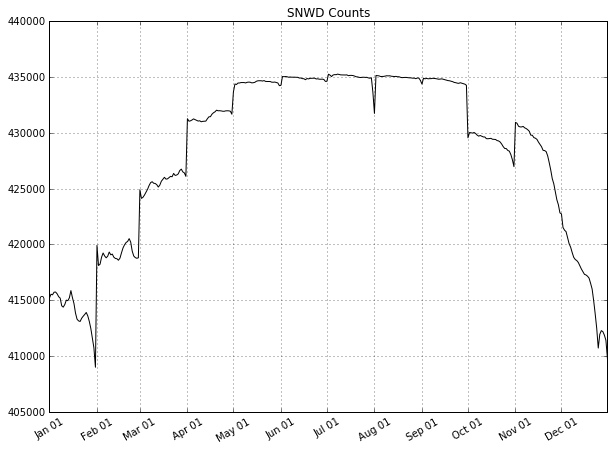

In [90]:
YearlyPlots(STAT['SNWD']['NE'], ttl='SNWD Counts', c='k')

### Plot SNWD counts for every decade.

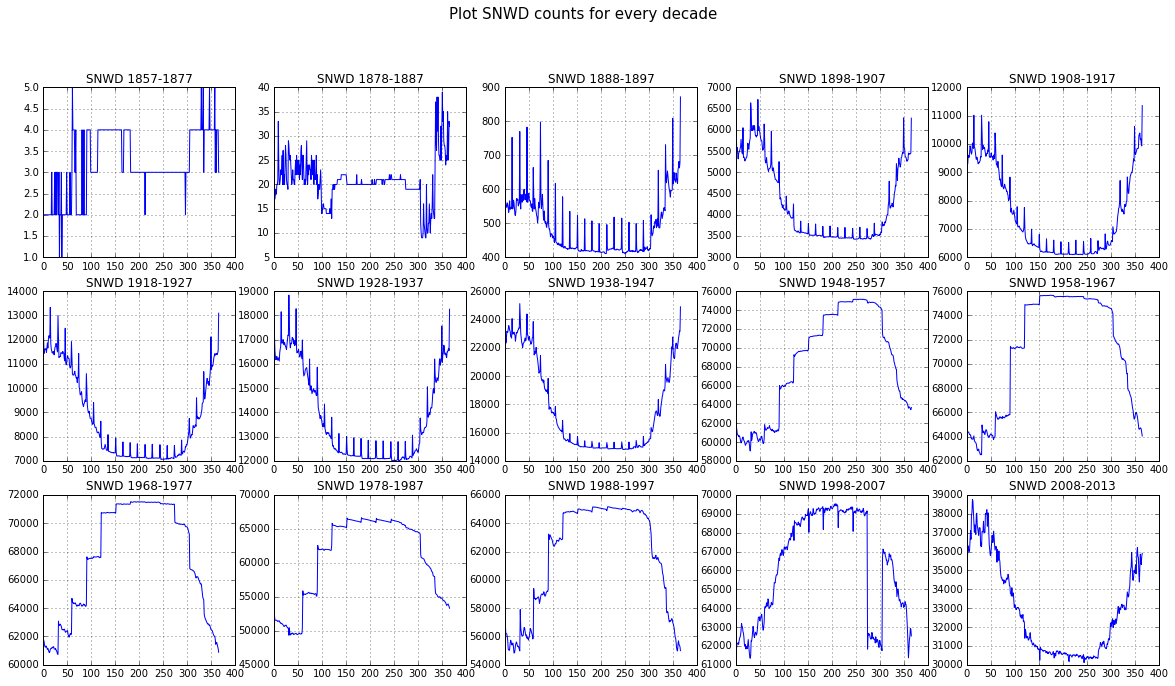

In [88]:
snwd_all_years = pickle.load(open(data_dir + 'snwd_all_years.pickle','r'))
snwd_year_df = pd.DataFrame({year:counts for year, counts in snwd_all_years}, index=range(1, 366)).T

num_columns = 5
num_rows = 4
# Plot the images
fig = plt.figure(figsize=(num_columns * 4, 3.5 * num_rows))
fig.suptitle("Plot SNWD counts for every decade", fontsize=15)
val_range = 10
for i, j in enumerate(range(0, len(snwd_year_df), val_range)):
    ax = fig.add_subplot(num_rows, num_columns, i + 1)
    start_index, end_index = (j, j + val_range - 1) if \
        j + val_range -1 <= len(snwd_year_df) - 1 else (j, len(snwd_year_df) - 1)
    ax.plot(snwd_year_df.columns,
            snwd_year_df.iloc[start_index:end_index, :].sum().values, c='b')
    start_year, end_year = str(int(snwd_year_df.index[start_index])), str(int(snwd_year_df.index[end_index]))
    ax.set(title="SNWD " + start_year + "-" + end_year)
    ax.grid()

### Plot SNWD for every group of stations.

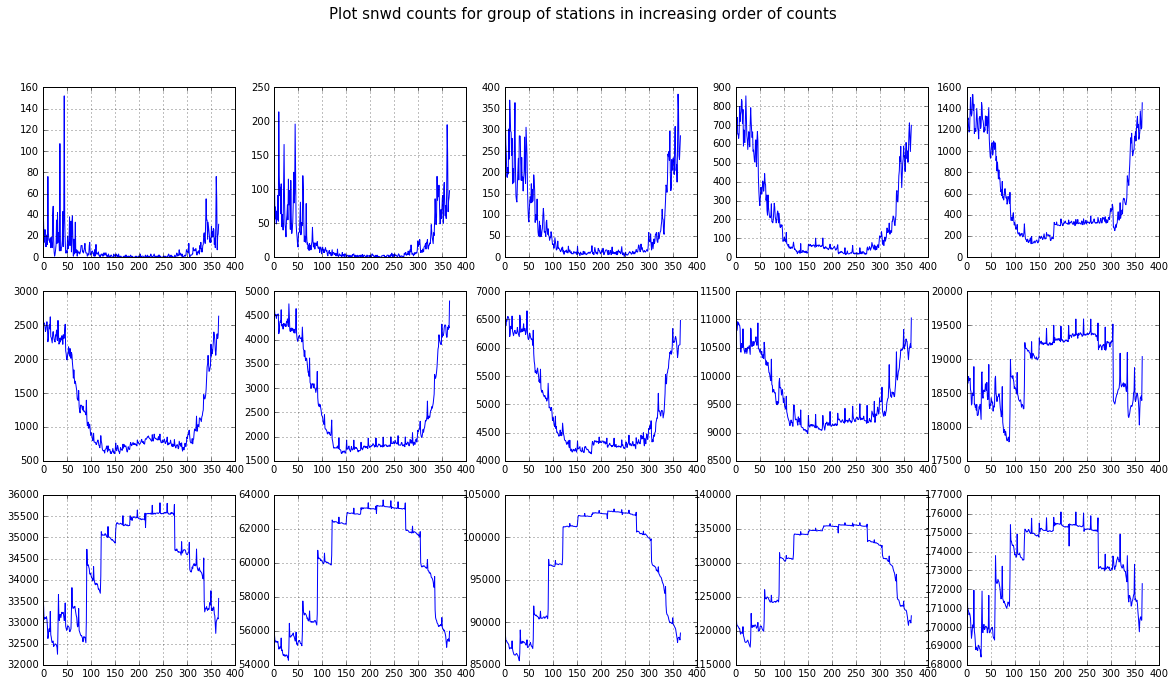

In [89]:
snwd_all_stations = pickle.load(open(data_dir + 'snwd_all_stations.pickle','r'))
snwd_station_df = pd.DataFrame({station:counts for station, counts in snwd_all_stations}, index=range(1, 366)).T

# Find the indices that sort the total counts.
sorted_index = snwd_station_df.sum(axis=1).argsort()

# rearrange the data frame according to sorted index.
snwd_station_df = snwd_station_df.iloc[sorted_index, :]

num_columns = 5
num_rows = 4

val_range = len(snwd_station_df) / 15 + 1
# Plot the images
fig = plt.figure(figsize=(num_columns * 4, 3.5 * num_rows))
fig.suptitle("Plot snwd counts for group of stations in increasing order of counts", fontsize=15)
for i, j in enumerate(range(0, len(snwd_station_df), val_range)):
    ax = fig.add_subplot(num_rows, num_columns, i + 1)
    start_index, end_index = (j, j + val_range  - 1) \
        if j + val_range- 1 <= len(snwd_station_df) - 1 else (j, len(snwd_station_df) - 1)
    ax.plot(snwd_station_df.columns,
            snwd_station_df.iloc[start_index:end_index, :].sum().values, c='b')
    ax.grid()

### Plot the following 3 plots for each measurement:

1. The percentage of variance explained by top-k eigen vectors for k between 1 to 9
2. Plot of mean and mean $\pm$ std
3. Plot of top 3 eigenvectors

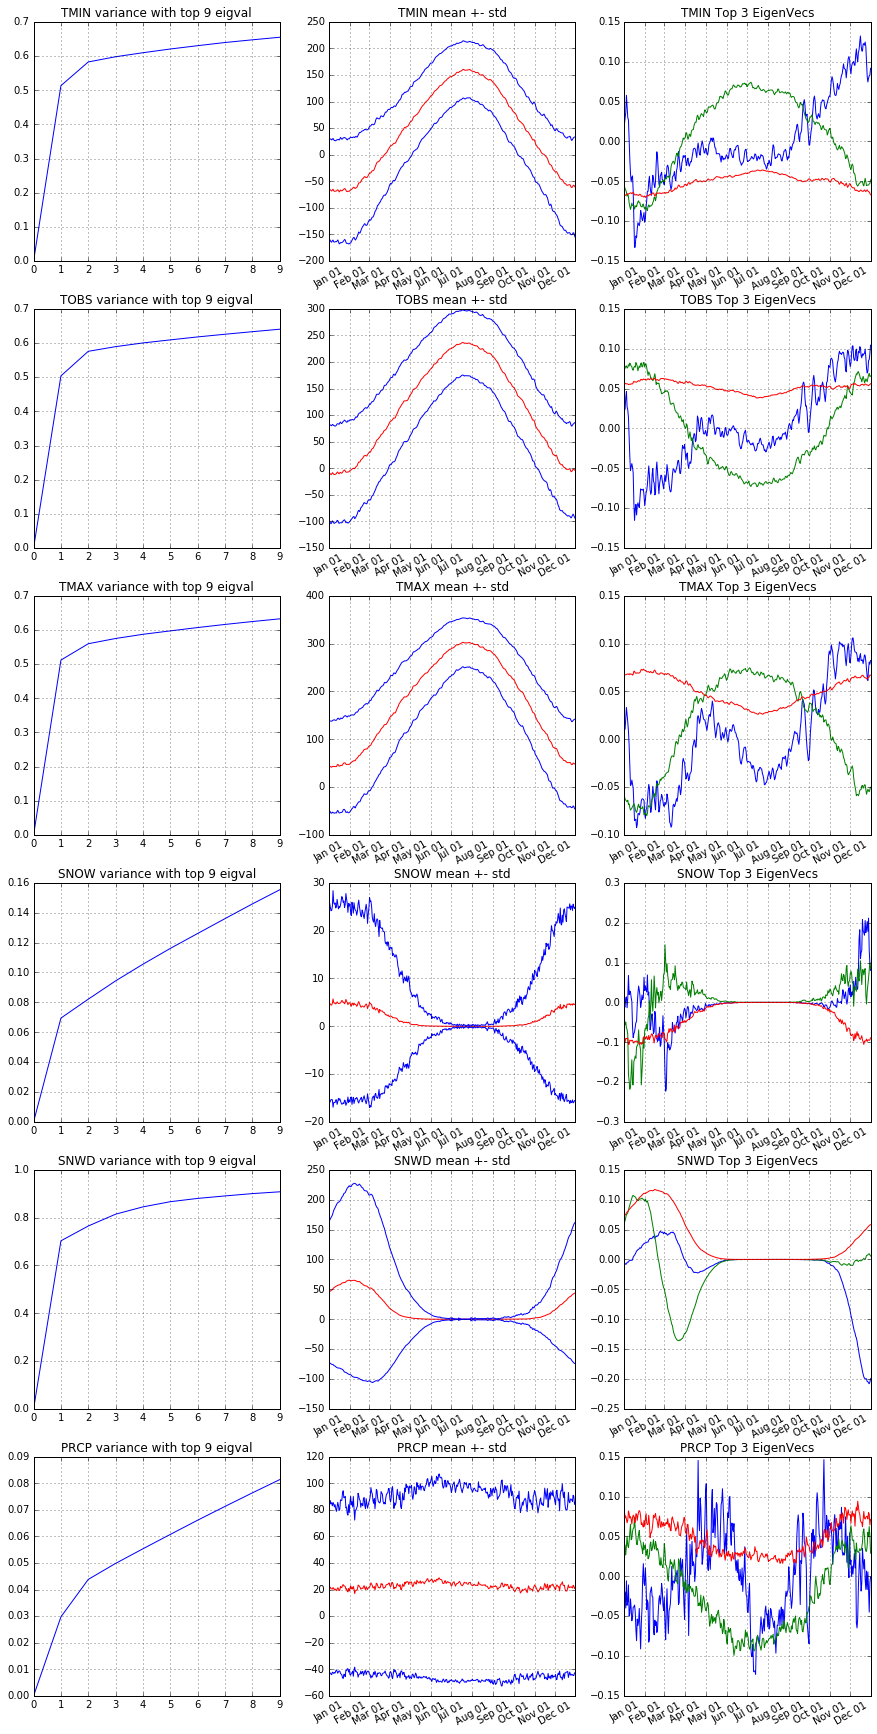

In [10]:
figure(figsize=(15,30))
offset=1
num_top_eig_vecs = 9
for meas in STAT.keys():
    subplot(6,3,offset)
    offset+=1
    ## Your code for percentage of variance explained
    eig_data = STAT[meas]['eigval']
    var_explained = np.sort(eig_data)[::-1].cumsum() / eig_data.sum()
    plt.plot([0] + var_explained[:num_top_eig_vecs].tolist())
    plt.title(meas + ' variance with top 9 eigval')
    plt.grid()

    subplot(6,3,offset)
    offset+=1
    ## Your code for mean and mean +- std
    YearlyPlots(STAT[meas]['Mean'], c='r')
    YearlyPlots(STAT[meas]['Mean'] + np.sqrt(STAT[meas]['Var']), c='b')
    YearlyPlots(STAT[meas]['Mean'] - np.sqrt(STAT[meas]['Var']), ttl=meas + " mean +- std", c='b')

    subplot(6,3,offset)
    offset+=1
    ## Your code for top-3 eigenvectors
    indices = STAT[meas]['eigval'].argsort()[-3:]
    YearlyPlots(STAT[meas]['eigvec'][:, indices], ttl=meas + ' Top 3 EigenVecs')